In [ ]:
import pandas as pd
sal = pd.read_csv("/content/drive/MyDrive/Home Practice Datasets/salaries.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sal.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
sal.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [ ]:
sal.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [ ]:
sal.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

In [ ]:
print(sal.columns)

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')


In [ ]:
inputs = sal.drop('salary_more_then_100k', axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
target = sal['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
print(inputs.columns)

Index(['company', 'job', 'degree'], dtype='object')


In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
print(inputs_n.columns)

Index(['company_n', 'job_n', 'degree_n'], dtype='object')


In [ ]:
features_cols=['company_n', 'job_n']
X=inputs_n[features_cols]
y=inputs_n.degree_n

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

In [ ]:
X_train.head()

,company_n,job_n
11,1,2
6,0,2
14,1,1
5,2,1
2,2,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create Object of classifier
dtc=DecisionTreeClassifier(criterion='entropy')

#Train and Build the model
dtc.fit(X_train,y_train)

#Test the model
y_predict=dtc.predict(X_test)

In [ ]:
from sklearn import metrics
print('Accuracy is', metrics.accuracy_score(y_test,y_predict))

Accuracy is 0.0


[Text(0.5555555555555556, 0.9, 'x[1] <= 1.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.2222222222222222, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.5, 'x[1] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5555555555555556, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7777777777777778, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7777777777777778, 0.7, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples

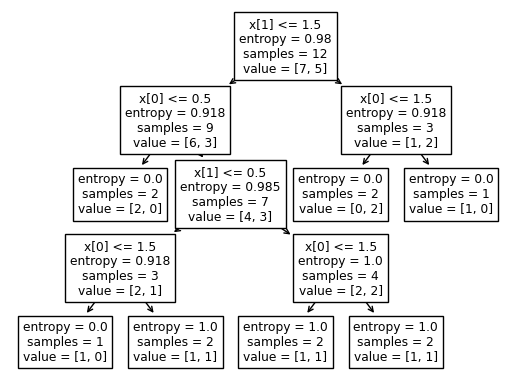

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

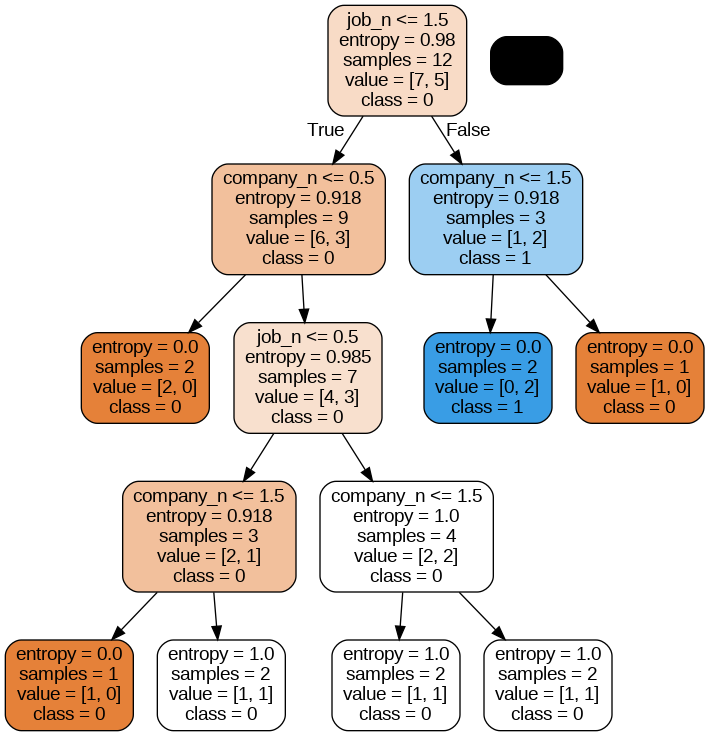

In [ ]:
#Creating a Tree
from sklearn.tree import export_graphviz

#Creating an Output file
from io import StringIO

#Writing Data
import pydotplus

from IPython.display import Image

#Create an empty file
out_data=StringIO()

#Create a Tree
export_graphviz(dtc,out_file=out_data,feature_names=features_cols,class_names=['0','1'],rounded='True',filled='True')

#Convert to Pic
graph=pydotplus.graph_from_dot_data(out_data.getvalue())

#Write it to a file
graph.write_png("d1.png")

#display the Image
Image(graph.create_png())